In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [62]:
import pandas as pd
#First loading the data of crash and collision which has 3000 data from NYC
df = pd.read_excel("Motor_Vehicle_Collisions-Crashes.xlsx")
df.columns = df.columns.str.strip()
df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2023-11-01,01:29:00,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2022-09-21,13:21:00,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [63]:
#Finding the best columns that has both date and column
dates = [x for x in df.columns if "date" in x.lower()]
time = [y for y in df.columns if "time" in y.lower()]

#  bestColum function then catch the best colm from the list
def bestColm(crash_colm):
    if not crash_colm:
        return None
    for key in ["crash", "collision"]:
        for val in crash_colm:
            if key in val.lower():
                return val
    return crash_colm[0] 

date_colm = bestColm(dates)
time_colm = bestColm(time)

print("We use date_colm:", date_colm)
print("We use time_colm:", time_colm)
df.head(5)



We use date_colm: CRASH DATE
We use time_colm: CRASH TIME


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2023-11-01,01:29:00,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2022-09-21,13:21:00,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


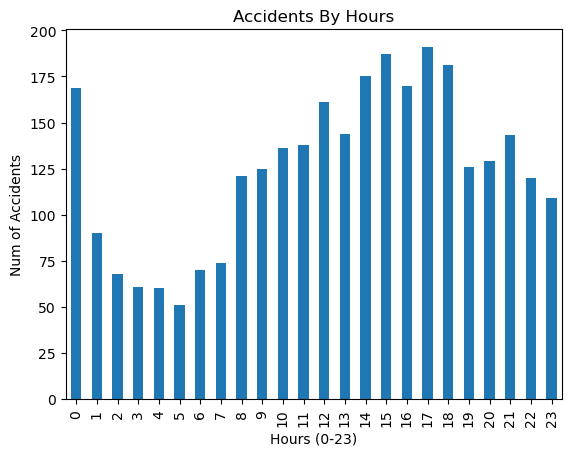

In [64]:
# ACcident by Hours
if date_colm is None:
    raise ValueError("No DATE column found.")

if time_colm is None:
    df["CrashDateTime"] = pd.to_datetime(df[date_colm], errors="coerce")
else:
    df["CrashDateTime"] = pd.to_datetime(df[date_colm].astype(str) + " " + df[time_colm].astype(str),errors="coerce")

hoursCnt = df["CrashDateTime"].dropna().dt.hour.value_counts().sort_index()

hoursCnt.plot(kind="bar")
plt.title("Accidents By Hours")
plt.xlabel("Hours (0-23)")
plt.ylabel("Num of Accidents")
plt.show()

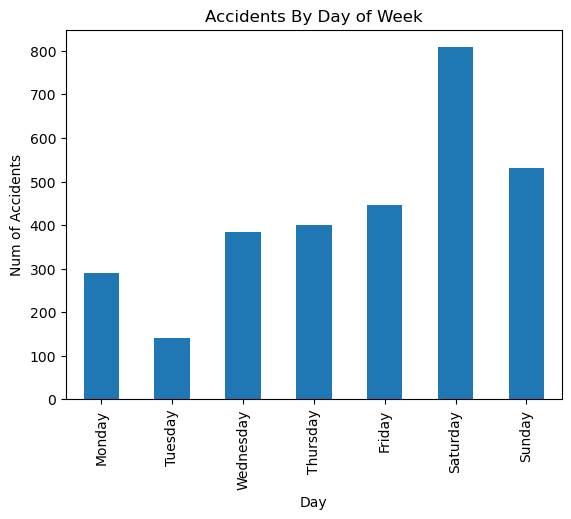

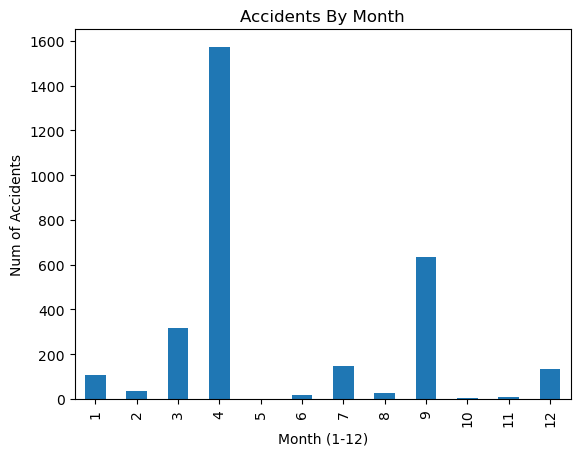

In [65]:
#  Accidents by Day of Week
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

daysCnt = (df["CrashDateTime"].dropna().dt.day_name().value_counts().reindex(day_order))

daysCnt.plot(kind="bar")
plt.title("Accidents By Day of Week")
plt.xlabel("Day")
plt.ylabel("Num of Accidents")
plt.show()


#Accidents by Month
monthCnt = (df["CrashDateTime"].dropna().dt.month.value_counts().sort_index())

monthCnt.plot(kind="bar")
plt.title("Accidents By Month")
plt.xlabel("Month (1-12)")
plt.ylabel("Num of Accidents")
plt.show()


In [66]:
#Average accidents per hours in bin (0-23)
expected_accidents_every_hour = hoursCnt.mean()
print("The average accidents per hour-bin:", expected_accidents_every_hour)

The average accidents per hour-bin: 124.95833333333333


In [70]:
#Probability accident happens in selected busy hours
peak_hours = [7, 8, 9, 16, 17, 18]

# take hour straight from CrashDateTime
hours = df["CrashDateTime"].dropna().dt.hour

probality = hours.isin(peak_hours).mean()
print("Probability accident happens in selected hours:", probality)


Probability accident happens in selected hours: 0.2874291430476826


The slope is : 3.2456521739130437
The intercept is: 87.63333333333333


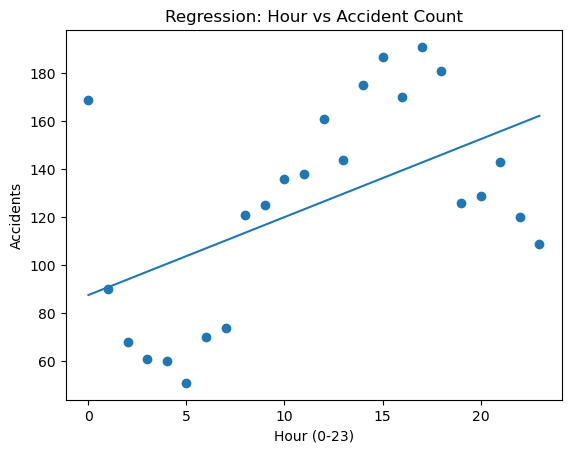

In [71]:
#  Linear Regression 

X = hoursCnt.index.to_numpy().reshape(-1, 1)   # hours (0..23)
y = hoursCnt.values                            # accident counts

model = LinearRegression()
model.fit(X, y)

print("The slope is :", model.coef_[0])
print("The intercept is:", model.intercept_)

# we do plot points and regression line
plt.scatter(hoursCnt.index, hoursCnt.values)
plt.plot(hoursCnt.index, model.predict(X))
plt.title("Regression: Hour vs Accident Count")
plt.xlabel("Hour (0-23)")
plt.ylabel("Accidents")
plt.show()

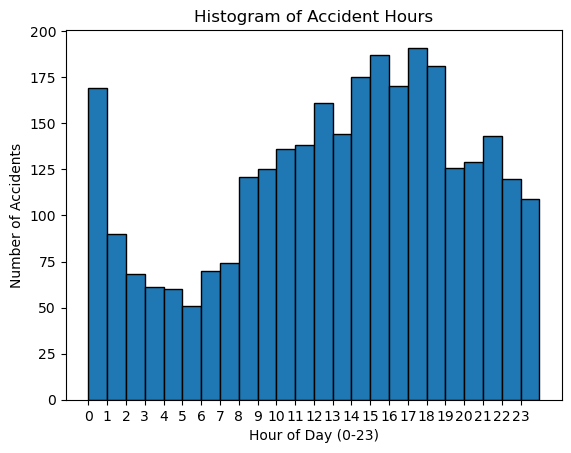

In [72]:
hours = df["CrashDateTime"].dropna().dt.hour

# we have  bins from 0 to 24 so each hour has its own bin
bins = np.arange(0, 25)

plt.hist(hours, bins=bins, edgecolor="black")
plt.title("Histogram of Accident Hours")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Accidents")

#here range ticks 
plt.xticks(range(0, 24))

plt.show()